In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('./datasets/BlinkIT Grocery Data.xlsx')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outlet Establishment Year,8523.0,2016.450546,3.189396,2011.000,2014.000000,2016.000000,2018.000000,2022.000000
Item Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Sales,8523.0,140.992783,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Rating,8523.0,3.965857,0.605651,1.000,4.000000,4.000000,4.200000,5.000000


In [6]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [7]:
for col in df.columns:
  print(col, '-->', df[col].unique(), '\n')

Item Fat Content --> ['Regular' 'Low Fat' 'low fat' 'LF' 'reg'] 

Item Identifier --> ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52'] 

Item Type --> ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods'] 

Outlet Establishment Year --> [2012 2022 2016 2014 2015 2020 2011 2018 2017] 

Outlet Identifier --> ['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019'] 

Outlet Location Type --> ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet Size --> ['Medium' 'Small' 'High'] 

Outlet Type --> ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 

Item Visibility --> [0.1000135  0.00859605 0.02589649 ... 0.03470581 0.02757094 0.10771483] 

Item Weight --> [15.1   11.8   13.85  12.15  19.6    8.89  19.7   20.75     nan 18.85
 17.1   16.35  20.25  17.85  19.2   12.1    6.85  17.25 

In [8]:
# Item Fat Content --> ['Regular' 'Low Fat' 'low fat' 'LF' 'reg'] 
df['Item Fat Content'].replace({'reg': 'Regular',
                                'LF': 'Low Fat',
                                'low fat': 'Low Fat'}, inplace=True)
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [9]:
def group_age(yr):
  age = 2024 - yr
  if age >= 0 and age <= 5:
    return '0-5 years'
  if age > 5 and age <= 10:
    return '6-10 years'
  return 'More than 10 years'


df['Outlet Establishment Age'] = df['Outlet Establishment Year'].apply(group_age)
df['Outlet Establishment Age']

0       More than 10 years
1                0-5 years
2               6-10 years
3               6-10 years
4               6-10 years
               ...        
8518            6-10 years
8519            6-10 years
8520            6-10 years
8521            6-10 years
8522            6-10 years
Name: Outlet Establishment Age, Length: 8523, dtype: object

In [17]:
# Replace missing weights
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
Outlet Establishment Age     0
dtype: int64

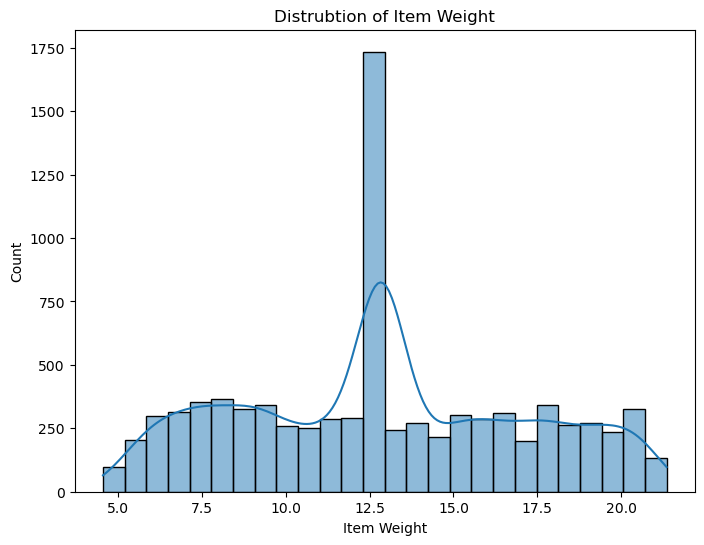

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Item Weight'], kde=True)
plt.title('Distrubtion of Item Weight');

<Axes: xlabel='Item Weight'>

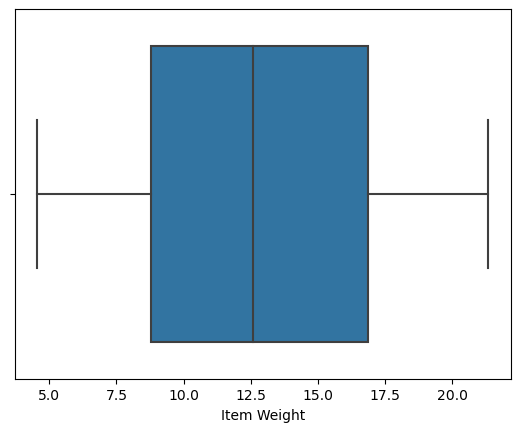

In [11]:
sns.boxplot(x='Item Weight', data=df)

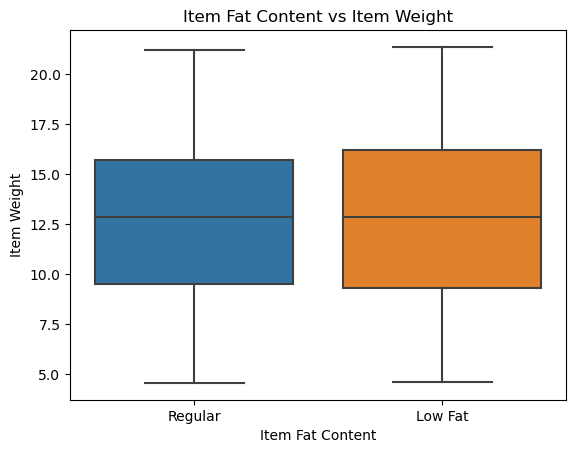

In [34]:
# Weight vs Weight
sns.boxplot(x='Item Fat Content', y='Item Weight', data=df)
plt.title('Item Fat Content vs Item Weight');

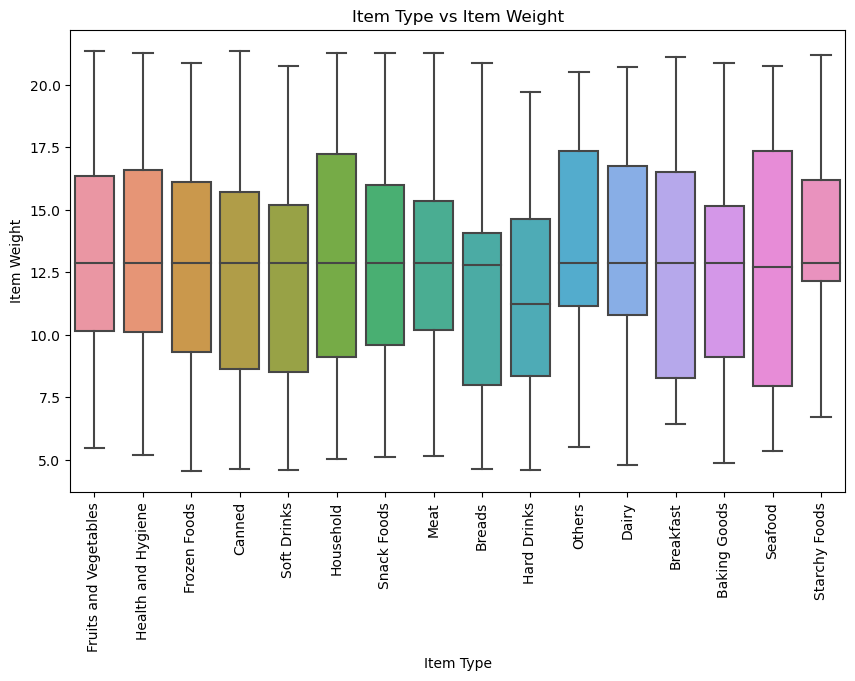

In [36]:
# Type vs Weight
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item Type', y='Item Weight', data=df)
plt.title('Item Type vs Item Weight');
plt.xticks(rotation=90);

In [14]:
# Item Weight showed significant variablity with Item Type

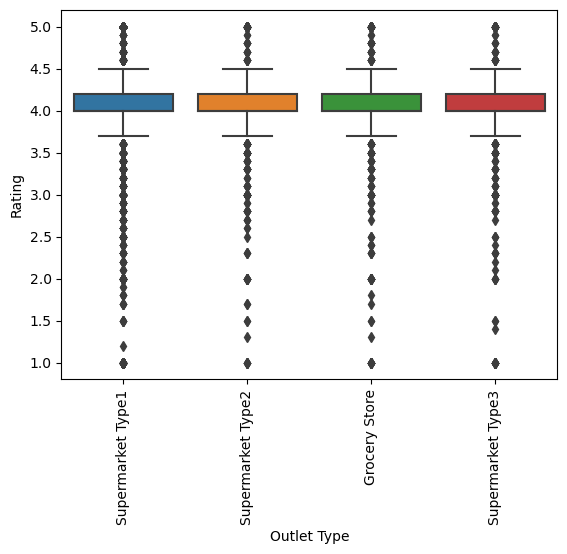

In [18]:
sns.boxplot(x='Outlet Type', y='Rating', data=df)
plt.xticks(rotation=90);

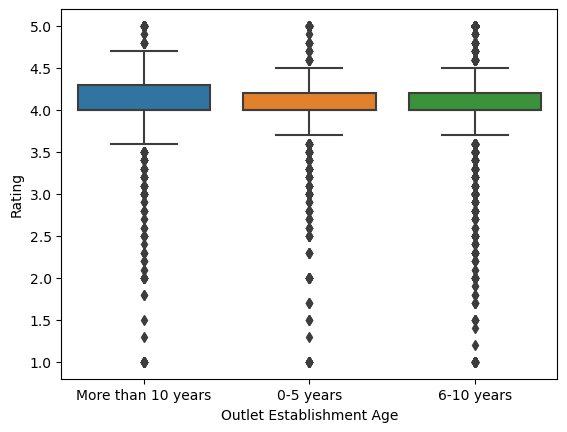

In [19]:
sns.boxplot(x='Outlet Establishment Age', y='Rating', data=df);

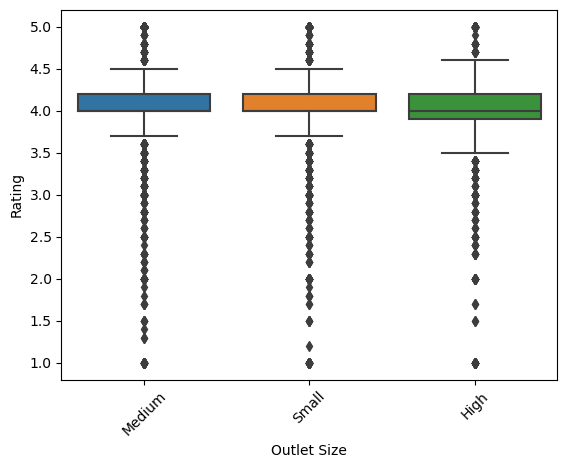

In [20]:
sns.boxplot(x='Outlet Size', y='Rating', data=df)
plt.xticks(rotation=45);

In [21]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Establishment Age
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,More than 10 years
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,0-5 years
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,6-10 years
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,6-10 years
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,6-10 years


In [22]:
X = df.drop(columns=['Item Identifier',
                     'Outlet Establishment Year',
                     'Outlet Identifier',
                     'Rating'])
y = df['Rating']
X.head()

,Item Fat Content,Item Type,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Outlet Establishment Age
0,Regular,Fruits and Vegetables,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,More than 10 years
1,Low Fat,Health and Hygiene,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,0-5 years
2,Regular,Frozen Foods,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,6-10 years
3,Regular,Canned,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,6-10 years
4,Low Fat,Soft Drinks,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,6-10 years


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
ohe = OneHotEncoder(dtype=int, sparse_output=True)
ohe.fit_transform(X).toarray()

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [25]:
pipeline = Pipeline([
  ('ohe', OneHotEncoder(dtype=int, sparse_output=True)),
  ('std_sc', StandardScaler(with_mean=False))
])

In [26]:
X_transformed = pipeline.fit_transform(X).toarray()
X_transformed

array([[0.        , 2.09289051, 0.        , ..., 0.        , 0.        ,
        2.63635949],
       [2.09289051, 0.        , 0.        , ..., 2.42385851, 0.        ,
        0.        ],
       [0.        , 2.09289051, 0.        , ..., 0.        , 2.04857459,
        0.        ],
       ...,
       [2.09289051, 0.        , 0.        , ..., 0.        , 2.04857459,
        0.        ],
       [0.        , 2.09289051, 0.        , ..., 0.        , 2.04857459,
        0.        ],
       [0.        , 2.09289051, 0.        , ..., 0.        , 2.04857459,
        0.        ]])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y.values, random_state=24)

In [28]:
def evaluate_model(model_name, y_pred):
  return {
    'model': model_name,
    'mae': mean_absolute_error(y_test, y_pred),
    'mse': mean_squared_error(y_test, y_pred),
    'r2': r2_score(y_test, y_pred)
  }

def train_model(model_info):
  model_name, model = model_info
  model.fit(X_train, y_train) # Train each model
  y_pred = model.predict(X_test) # Get predictions
  return evaluate_model(model_name, y_pred) # Evaluate each model

In [29]:
models = [
  ('Linear Reg', LinearRegression()),
  # ('Decision Tree', DecisionTreeRegressor(max_depth=150, min_samples_split=19, max_leaf_nodes=50)),
  # ('Random Forest', RandomForestRegressor()),
  # ('XGB Regressor', XGBRegressor()),
]

In [30]:
# evals = [*map(train_model, models)]
# evals